# 비지도학습 준비

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/teeth_preprocessing3.csv',index_col=0, encoding='utf-8')
df

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section
0,5,0,사용법 편하고 오랫동안 입 벌리고 있지 않아도 돼서 너무 좋아요 2분 정도만 치아 ...,0.051814,"['사용법', '편하', '고', '오랫동안', '입', '벌리', '고', '있'...",0,273,4
1,4,0,2주분 구매했고 매일 사용하지 못해서 아직 사용하고 있는데 하얘지는 건지 뭔지 잘 ...,0.774964,"['2', '주', '분', '구매', '하', '었', '고', '매일', '사용...",-5,272,4
2,3,1,아랫부분을 오른쪽으로 돌리라고 해서 맨 밑동을 한참 돌려도 안 나오길래 불량인가 했...,0.096529,"['아랫부분', '을', '오른쪽', '으로', '돌리', '라고', '하', '어...",3,352,4
3,5,2,꼭 참고하세요 좋아요 근데 바른 이십 분 동안은 침이 닿으면 안 돼요 침 닿은 곳은...,0.540029,"['꼭', '참고', '하세', '요', '좋', '아요', '근데', '바르', ...",4,224,4
4,3,1,가격이 다른 것보다 조금 있어요 오늘 삼 일째 쓰는데 아주 드라마틱 한 효과는 아니...,0.893208,"['가격', '이', '다르', 'ㄴ', '것', '보다', '조금', '있', '...",-1,185,4
...,...,...,...,...,...,...,...,...
3949,5,0,만족하며 잘 사용하고 있습니다,0.950180,"['만족', '하', '며', '잘', '사용', '하', '고', '있', '습니다']",2,17,1
3950,4,0,선물해준 거라서 모르겠네요,0.341462,"['선물', '하', '어', '주', 'ㄴ', '거', '라서', '모르', '겠...",-1,14,1
3951,5,0,이가 하얗게 되느거같애요 굿,0.864961,"['이', '가', '하얗', '게', '되느거같애', '요', '굿']",0,15,1
3952,4,1,배송 빠르고요 제품 작동 잘 돼요,0.965550,"['배송', '빠르', '고요', '저', '의', '품', '작동', '잘', '...",2,18,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8854d2450>,
      dtype=object)

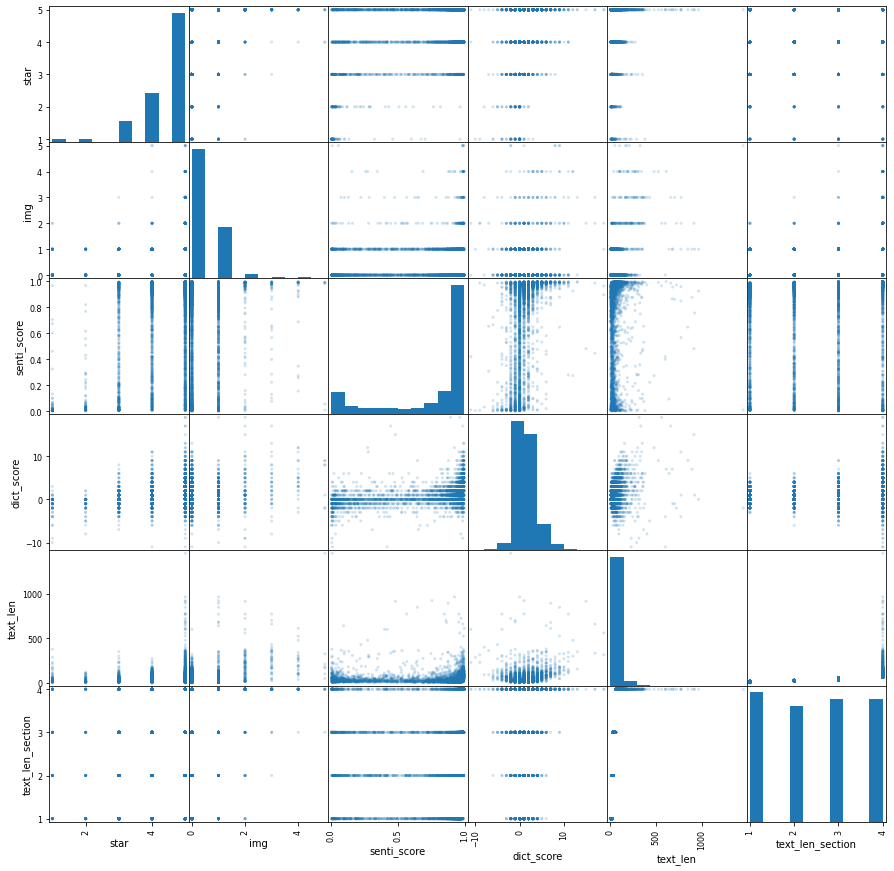

In [ ]:
df_scatter = df.drop(columns=['modi_text','tokenized'])
pd.plotting.scatter_matrix(df_scatter, alpha=0.2, figsize=(15,15))

In [ ]:
# 감성분석 값 조정
df['senti_analy'] = 0
for i in range(3954):
  if df.loc[i, 'senti_score'] > 0.5:
    df.loc[i, 'senti_analy'] = 1
  else:
    df.loc[i, 'senti_analy'] = -1
df.head()

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy
0,5,0,사용법 편하고 오랫동안 입 벌리고 있지 않아도 돼서 너무 좋아요 2분 정도만 치아 ...,0.051814,"['사용법', '편하', '고', '오랫동안', '입', '벌리', '고', '있'...",0,273,4,-1
1,4,0,2주분 구매했고 매일 사용하지 못해서 아직 사용하고 있는데 하얘지는 건지 뭔지 잘 ...,0.774964,"['2', '주', '분', '구매', '하', '었', '고', '매일', '사용...",-5,272,4,1
2,3,1,아랫부분을 오른쪽으로 돌리라고 해서 맨 밑동을 한참 돌려도 안 나오길래 불량인가 했...,0.096529,"['아랫부분', '을', '오른쪽', '으로', '돌리', '라고', '하', '어...",3,352,4,-1
3,5,2,꼭 참고하세요 좋아요 근데 바른 이십 분 동안은 침이 닿으면 안 돼요 침 닿은 곳은...,0.540029,"['꼭', '참고', '하세', '요', '좋', '아요', '근데', '바르', ...",4,224,4,1
4,3,1,가격이 다른 것보다 조금 있어요 오늘 삼 일째 쓰는데 아주 드라마틱 한 효과는 아니...,0.893208,"['가격', '이', '다르', 'ㄴ', '것', '보다', '조금', '있', '...",-1,185,4,1


In [ ]:
# 모든 feature 값들 스케일 조정해주기
df['star'] = df['star'] / 2
df['img'] = df['img'] * 10
df['text_len_section'] = df['text_len_section'] * 5
df['senti_analy'] = df['senti_analy'] * 5
df['dict&senti'] = (df['senti_analy']/5) * (abs(df['dict_score']))
df.head()

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,dict&senti
0,2.5,0,사용법 편하고 오랫동안 입 벌리고 있지 않아도 돼서 너무 좋아요 2분 정도만 치아 ...,0.051814,"['사용법', '편하', '고', '오랫동안', '입', '벌리', '고', '있'...",0,273,20,-5,-0.0
1,2.0,0,2주분 구매했고 매일 사용하지 못해서 아직 사용하고 있는데 하얘지는 건지 뭔지 잘 ...,0.774964,"['2', '주', '분', '구매', '하', '었', '고', '매일', '사용...",-5,272,20,5,5.0
2,1.5,10,아랫부분을 오른쪽으로 돌리라고 해서 맨 밑동을 한참 돌려도 안 나오길래 불량인가 했...,0.096529,"['아랫부분', '을', '오른쪽', '으로', '돌리', '라고', '하', '어...",3,352,20,-5,-3.0
3,2.5,20,꼭 참고하세요 좋아요 근데 바른 이십 분 동안은 침이 닿으면 안 돼요 침 닿은 곳은...,0.540029,"['꼭', '참고', '하세', '요', '좋', '아요', '근데', '바르', ...",4,224,20,5,4.0
4,1.5,10,가격이 다른 것보다 조금 있어요 오늘 삼 일째 쓰는데 아주 드라마틱 한 효과는 아니...,0.893208,"['가격', '이', '다르', 'ㄴ', '것', '보다', '조금', '있', '...",-1,185,20,5,1.0


In [ ]:
# 비지도학습에 필요없는 컬럼 드랍해주기 (두 개의 세트를 만들었음)
df_cluster = df.drop(columns=['modi_text','tokenized', 'senti_score', 'text_len']) # 1번: 더 적은 feature를 drop한 set 
df_cluster2 = df.drop(columns=['modi_text','tokenized', 'senti_score', 'text_len', 'senti_analy', 'dict_score']) # 2번: 더 많은 feature를 drop한 set
df_cluster2.head()

,star,img,text_len_section,dict&senti
0,2.5,0,20,-0.0
1,2.0,0,20,5.0
2,1.5,10,20,-3.0
3,2.5,20,20,4.0
4,1.5,10,20,1.0


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()


# Inertia 값 구해서 그래프로 표현해보기 => Cluster 개수 5개로 결정
ks = range(1,11)
inertias = list()

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', random_state=1)
    model.fit_predict(df_cluster)
    inertias.append(model.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter( x=list(ks), y=inertias, mode='lines+markers' ))
fig.show()

In [ ]:
# 비지도학습의 여러가지 모델을 사용해보기
model = KMeans(n_clusters=5, init='k-means++', random_state=1)
prediction = model.fit_predict(df_cluster)

df['kmeans_cluster'] = prediction

model = AgglomerativeClustering(n_clusters=5)
prediction = model.fit_predict(df_cluster)

df['hierarchical_cluster'] = prediction

model = DBSCAN(eps=3, min_samples=20)
prediction = model.fit_predict(df_cluster)

df['dbscan_cluster'] = prediction

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans')
prediction = model.fit_predict(df_cluster)

df['spectral_cluster'] = prediction

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
df.head() # 데이터를 보았을 때 Hierarchical Cluster 사용 시 가장 유의미한 결과가 나타난 것으로 판단

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,dict&senti,kmeans_cluster,hierarchical_cluster,dbscan_cluster,spectral_cluster
0,2.5,0,사용법 편하고 오랫동안 입 벌리고 있지 않아도 돼서 너무 좋아요 2분 정도만 치아 ...,0.051814,"['사용법', '편하', '고', '오랫동안', '입', '벌리', '고', '있'...",0,273,20,-5,-0.0,0,0,0,1
1,2.0,0,2주분 구매했고 매일 사용하지 못해서 아직 사용하고 있는데 하얘지는 건지 뭔지 잘 ...,0.774964,"['2', '주', '분', '구매', '하', '었', '고', '매일', '사용...",-5,272,20,5,5.0,1,4,1,1
2,1.5,10,아랫부분을 오른쪽으로 돌리라고 해서 맨 밑동을 한참 돌려도 안 나오길래 불량인가 했...,0.096529,"['아랫부분', '을', '오른쪽', '으로', '돌리', '라고', '하', '어...",3,352,20,-5,-3.0,0,0,4,1
3,2.5,20,꼭 참고하세요 좋아요 근데 바른 이십 분 동안은 침이 닿으면 안 돼요 침 닿은 곳은...,0.540029,"['꼭', '참고', '하세', '요', '좋', '아요', '근데', '바르', ...",4,224,20,5,4.0,2,1,2,1
4,1.5,10,가격이 다른 것보다 조금 있어요 오늘 삼 일째 쓰는데 아주 드라마틱 한 효과는 아니...,0.893208,"['가격', '이', '다르', 'ㄴ', '것', '보다', '조금', '있', '...",-1,185,20,5,1.0,3,2,3,1


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

ks = range(1,11)
inertias = list()

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', random_state=1)
    model.fit_predict(df_cluster2)
    inertias.append(model.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter( x=list(ks), y=inertias, mode='lines+markers' ))
fig.show()

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=1)
prediction = model.fit_predict(df_cluster2)

df_cluster2['kmeans_cluster'] = prediction

model = AgglomerativeClustering(n_clusters=4)
prediction = model.fit_predict(df_cluster2)

df_cluster2['hierarchical_cluster'] = prediction

model = DBSCAN(eps=3, min_samples=20)
prediction = model.fit_predict(df_cluster2)

df_cluster2['dbscan_cluster'] = prediction

model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
prediction = model.fit_predict(df_cluster2)

df_cluster2['spectral_cluster'] = prediction

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
configure_plotly_browser_state()
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_cluster['text_len_section'], y=df_cluster['dict&senti'], 
        mode='markers', marker=dict(color=df_cluster2['spectral_cluster']), showlegend=True
    ))

fig.show()

In [ ]:
df_cluster2.head()

,star,img,text_len_section,dict&senti,hierarchical_cluster,kmeans_cluster,dbscan_cluster,spectral_cluster
0,2.5,0,20,-0.0,0,0,0,0
1,2.0,0,20,5.0,0,0,0,1
2,1.5,10,20,-3.0,1,2,1,1
3,2.5,20,20,4.0,1,2,2,1
4,1.5,10,20,1.0,1,2,1,0


# 이후 여러번의 스케일 조정 및 Clustering 진행

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/clustering_teeth.xlsx',index_col=0)
df

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,kmeans_cluster,hierarchical_cluster,dbscan_cluster,spectral_cluster
0,2.5,0,사용법 편하고 오랫동안 입 벌리고 있지 않아도 돼서 너무 좋아요 2분 정도만 치아 ...,0.051814,"['사용법', '편하', '고', '오랫동안', '입', '벌리', '고', '있'...",0,273,20,-5,0,0,0,0
1,2.0,0,2주분 구매했고 매일 사용하지 못해서 아직 사용하고 있는데 하얘지는 건지 뭔지 잘 ...,0.774964,"['2', '주', '분', '구매', '하', '었', '고', '매일', '사용...",-5,272,20,5,0,0,0,0
2,1.5,10,아랫부분을 오른쪽으로 돌리라고 해서 맨 밑동을 한참 돌려도 안 나오길래 불량인가 했...,0.096529,"['아랫부분', '을', '오른쪽', '으로', '돌리', '라고', '하', '어...",3,352,20,-5,0,2,0,0
3,2.5,20,꼭 참고하세요 좋아요 근데 바른 이십 분 동안은 침이 닿으면 안 돼요 침 닿은 곳은...,0.540029,"['꼭', '참고', '하세', '요', '좋', '아요', '근데', '바르', ...",4,224,20,5,0,3,0,0
4,1.5,10,가격이 다른 것보다 조금 있어요 오늘 삼 일째 쓰는데 아주 드라마틱 한 효과는 아니...,0.893208,"['가격', '이', '다르', 'ㄴ', '것', '보다', '조금', '있', '...",-1,185,20,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2.5,0,만족하며 잘 사용하고 있습니다,0.950180,"['만족', '하', '며', '잘', '사용', '하', '고', '있', '습니다']",2,17,5,5,0,2,0,0
3950,2.0,0,선물해준 거라서 모르겠네요,0.341462,"['선물', '하', '어', '주', 'ㄴ', '거', '라서', '모르', '겠...",-1,14,5,-5,0,4,0,0
3951,2.5,0,이가 하얗게 되느거같애요 굿,0.864961,"['이', '가', '하얗', '게', '되느거같애', '요', '굿']",0,15,5,5,0,2,0,0
3952,2.0,10,배송 빠르고요 제품 작동 잘 돼요,0.965550,"['배송', '빠르', '고요', '저', '의', '품', '작동', '잘', '...",2,18,5,5,0,2,0,0


In [ ]:
model = AgglomerativeClustering(n_clusters=5)
prediction = model.fit_predict(df_cluster)

df_cluster['hierarchical_cluster'] = prediction

In [ ]:
configure_plotly_browser_state()
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df['text_len_section'], y=df['dict_score'], 
        mode='markers', marker=dict(color=df['hierarchical_cluster'])
    ))

fig.show()

In [ ]:
# 위 그래프에서 보라색에 해당하는 부분
df_second = df.loc[df['hierarchical_cluster']==1]
df_second

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,kmeans_cluster,hierarchical_cluster,dbscan_cluster,spectral_cluster
5,2.5,0,리뷰 안 쓰는데요 원래는 이렇게 시작하는 리뷰 안 믿었는데 나다 신통방통 하얘진다 ...,0.644592,"['리뷰', '안', '쓰', '는데요', '원래', '는', '이렇', '게', ...",5,196,20,5,0,1,0,2
9,1.5,10,이걸 쓰면 치아 표면이 깔끔하게 세척된 기분이 들긴 합니다 치약으로 칫솔질만 할 경...,0.867898,"['이것', '을', '쓰', '면', '치아', '표면', '이', '깔끔', '...",5,178,20,5,0,1,0,0
19,2.0,10,두 번째 구매입니다 첨에 써보고 효과 좋아서 또 샀는데 첨보다는 효과가 미미하네요 ...,0.990267,"['두', '번째', '구매', '이', 'ㅂ니다', '첨', '에', '써보', ...",6,137,20,5,0,1,0,0
59,2.5,0,진을 찍어놓을 걸 확실은 조금 톤이 밝아졌어요 원체 누렁이니라 티브이 치약 광고에 ...,0.980551,"['진', '을', '찍', '어', '놓', '을', '것', '을', '확실',...",8,106,20,5,0,1,0,0
63,2.0,10,1주 2주 후 기대해봅니다 커피와 티를 자주 마시니 점점 착색되는 거 같아 구매했어...,0.979451,"['1', '주', '2', '주', '후', '기대', '하', '어', '보',...",5,79,20,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,2.0,0,사진 찍을 때마다 환하게 웃을 때 신경이 쓰이더라고요 치과에서 미백 받으려니 비용이...,0.982503,"['사진', '찍', '을', '때', '마다', '환하', '게', '웃', '을...",6,102,20,5,0,1,0,0
3759,2.5,0,누런 이빨 때문에 스트레스였는데 확실히 미백에 도움이 돼서 만족스럽네요 세상이 참 ...,0.988885,"['누렇', 'ㄴ', '이빨', '때문', '에', '스트레스', '이', '었',...",5,109,20,5,0,1,0,2
3769,2.5,0,완전히 만족하면서 잘 쓰고 있습니다 많이 좋아진 것이 눈에 보여서 더 좋아요 편해서...,0.985850,"['완전히', '만족', '하', '면서', '잘', '쓰', '고', '있', '...",6,52,15,5,0,1,0,0
3774,2.5,0,만족합니다 배송도 정말 빨랐고요 카페인 중독이라 이가 많이 누러졌는데 치아미백 치과...,0.989201,"['만족', '하', 'ㅂ니다', '배', '송도', '정말', '빠르', '았',...",7,109,20,5,0,1,0,0


In [ ]:
df_second.drop(columns=['modi_text','tokenized','text_len_section','kmeans_cluster','dbscan_cluster','spectral_cluster'], axis=1, inplace=True)
df_second.head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster
5,2.5,0,0.644592,5,196,5,1
9,1.5,10,0.867898,5,178,5,1
19,2.0,10,0.990267,6,137,5,1
59,2.5,0,0.980551,8,106,5,1
63,2.0,10,0.979451,5,79,5,1


In [ ]:
# 이미지 스케일 조정 (이미지가 1개인거와 0개인 것의 차이 > 1개인 것과 2개인 것의 차이) / 이미지 첨부 여부 자체가 의미가 크다고 판단
df_second['img'].value_counts()

0     157
20     25
10     23
40     11
30     10
50      4
Name: img, dtype: int64

In [ ]:
def img_change(num):
  if num == 0:
    return 0
  elif num == 10:
    return 10
  elif num == 20:
    return 12.5
  elif num == 30:
    return 15
  elif num == 40:
    return 17.5
  elif num == 50:
    return 20

In [ ]:
df_second['img'] = df_second['img'].apply(img_change)
df_second.head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster
5,2.5,0.0,0.644592,5,196,5,1
9,1.5,10.0,0.867898,5,178,5,1
19,2.0,10.0,0.990267,6,137,5,1
59,2.5,0.0,0.980551,8,106,5,1
63,2.0,10.0,0.979451,5,79,5,1


In [ ]:
# 문장길이를 위에서 4개의 섹션으로 분할하기는 하였지만 보게되면 3사분위수 61인 반면 최대값은 1453.. 4번 째의 범위가 너무 넓다
df['text_len'].describe()

count    3954.000000
mean       53.588265
std        74.571843
min         3.000000
25%        19.000000
50%        31.000000
75%        61.000000
max      1453.000000
Name: text_len, dtype: float64

In [ ]:
df_second['text_len'] = df_second['text_len']/5
df_second.head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster
5,2.5,0.0,0.644592,5,39.2,5,1
9,1.5,10.0,0.867898,5,35.6,5,1
19,2.0,10.0,0.990267,6,27.4,5,1
59,2.5,0.0,0.980551,8,21.2,5,1
63,2.0,10.0,0.979451,5,15.8,5,1


In [ ]:
# 첫 번째 Clustering에서 1번 그룹으로 분류된 그룹을 다시 한 번 소그룹으로 분류해보려는 시도

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

ks = range(1,6)
inertias = list()

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', random_state=1)
    model.fit_predict(df_second)
    inertias.append(model.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter( x=list(ks), y=inertias, mode='lines+markers' ))
fig.show()

In [ ]:
#위에서도 계층적 군집화가 가장 의미있게 나왔기에 이것 사용
model = AgglomerativeClustering(n_clusters=3)
prediction = model.fit_predict(df_second)

df_second['cluster'] = prediction

In [ ]:
df_second['cluster'].value_counts()

0    190
2     29
1     11
Name: cluster, dtype: int64

In [ ]:
df_second.loc[df_second['cluster']==0].head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster,cluster
5,2.5,0.0,0.644592,5,39.2,5,1,0
9,1.5,10.0,0.867898,5,35.6,5,1,0
19,2.0,10.0,0.990267,6,27.4,5,1,0
59,2.5,0.0,0.980551,8,21.2,5,1,0
63,2.0,10.0,0.979451,5,15.8,5,1,0


In [ ]:
df_second.loc[df_second['cluster']==2].head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster,cluster
1965,2.5,17.5,0.923428,12,60.0,5,1,2
1966,2.5,10.0,0.973242,6,69.4,5,1,2
1968,2.5,17.5,0.987096,6,53.8,5,1,2
1974,2.5,12.5,0.020241,6,43.6,-5,1,2
2968,2.5,15.0,0.989261,6,76.4,5,1,2


In [ ]:
df_second.loc[df_second['cluster']==1].head()

,star,img,senti_score,dict_score,text_len,senti_analy,hierarchical_cluster,cluster
1961,2.5,17.5,0.272757,12,95.8,-5,1,1
2955,2.5,10.0,0.876293,7,178.8,5,1,1
2958,2.5,15.0,0.985518,17,132.2,5,1,1
2959,2.5,10.0,0.864250,7,135.6,5,1,1
2961,2.5,10.0,0.646527,9,169.6,5,1,1


## 위 그룹들의 분포를 보게되면 길이가 분류에 큰 영향을 미쳤음을 알 수 있음. 앞선 리뷰알바 조사 과정에서 댓글의 길이를 너무 길게는 하지 않는다는 것을 어느 정도 알아냄.(물론 모든 상품에 있어서 댓글알바의 리뷰길이가 통일되어있는 것은 아니지만) 그래서 본 비지도 학습을 통해 위에 2번 그룹에 해당하는, Senti_analy, dict_score 등이 높으면서 길이가 긴 것들 중 중간 그룹에 속하는 그룹이 가장 가짜리뷰에 가까울 것이라는 추측 가능 => But still 부정확, 리뷰알바가 교묘해지고 있다는 점~